In [ ]:
import pandas as pd
import numpy as np



# Φόρτωσε το dataset
data = pd.read_csv('dataset.csv')



# Εμφάνισε βασικές πληροφορίες
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
# Έλεγχος για κενές τιμές
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
# Συμπληρώνει τις ελλιπείς τιμές στο σύνολο δεδομένων με τη συμβολοσειρά "unknown"
data.fillna("unknown", inplace=True)

In [ ]:
#Επανέλεγχος για κενές τιμές
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Κανονικοποίηση (Min-Max Scaling) των δεδομένων
scaler = MinMaxScaler()
data_normalized = data.copy()

# Εφαρμογή κανονικοποίησης στις ποσοτικές στήλες
data_normalized[['energy', 'danceability', 'valence', 'tempo','popularity','loudness']] = scaler.fit_transform(data[['energy', 'danceability', 'valence', 'tempo','popularity','loudness']])

# έλεγχος για ακραίες τιμές μετά την κανονικοποίηση
for column in ['energy', 'danceability', 'valence', 'tempo','popularity','loudness']:
    Q1 = data_normalized[column].quantile(0.25)
    Q3 = data_normalized[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Εντοπισμός ακραίων τιμών
    outliers = data_normalized[(data_normalized[column] < lower_bound) | (data_normalized[column] > upper_bound)]

    if not outliers.empty:
        print(f"\nΑκραίες τιμές στη στήλη {column} (κανονικοποιημένα):")
        print(outliers[[column]])
    else:
        print(f"Δεν υπάρχουν ακραίες τιμές στη στήλη {column} (κανονικοποιημένα).")

Δεν υπάρχουν ακραίες τιμές στη στήλη energy (κανονικοποιημένα).

Ακραίες τιμές στη στήλη danceability (κανονικοποιημένα):
        danceability
4077        0.065990
4090        0.083147
4097        0.072386
4131        0.000000
4183        0.079492
...              ...
113856      0.000000
113899      0.089340
113912      0.091675
113940      0.057360
113977      0.068223

[620 rows x 1 columns]
Δεν υπάρχουν ακραίες τιμές στη στήλη valence (κανονικοποιημένα).

Ακραίες τιμές στη στήλη tempo (κανονικοποιημένα):
           tempo
32      0.830083
384     0.842172
519     0.837467
561     0.836789
655     0.830408
...          ...
113374  0.147059
113428  0.000000
113688  0.000000
113856  0.000000
113866  0.854170

[617 rows x 1 columns]

Ακραίες τιμές στη στήλη popularity (κανονικοποιημένα):
       popularity
20001         1.0
81051         1.0

Ακραίες τιμές στη στήλη loudness (κανονικοποιημένα):
        loudness
3       0.573701
16      0.581414
17      0.581562
116     0.393152
117     0

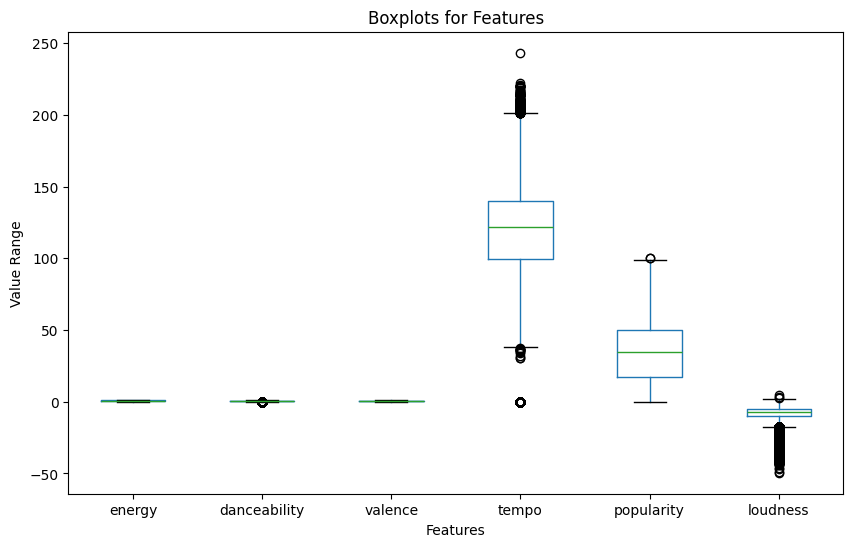

In [ ]:
import matplotlib.pyplot as plt
# Δημιουργία boxplots
plt.figure(figsize=(10, 6))
data[['energy', 'danceability', 'valence', 'tempo','popularity','loudness']].boxplot()
plt.title("Boxplots for Features")
plt.ylabel("Value Range")
plt.xlabel("Features")
plt.grid(False)  # Αν δεν θέλεις gridlines
plt.show()

In [ ]:
# Καθορισμός των ποσοτικών στηλών που θέλουμε να ελέγξουμε για ακραίες τιμές
quantitative_columns = ['energy', 'danceability', 'valence', 'tempo','popularity','loudness']

# Επαναλαμβανόμενος έλεγχος και αντικατάσταση ακραίων τιμών
for column in quantitative_columns:
    for i in range(2):  # Εκτελούμε τη διαδικασία δύο φορές για να καλύψουμε νέες ακραίες τιμές
        # Υπολογισμός του Q1 (25ο ποσοστό) και Q3 (75ο ποσοστό)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        # Υπολογισμός του IQR
        IQR = Q3 - Q1

        # Υπολογισμός των ορίων για τις ακραίες τιμές
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Υπολογισμός της διάμεσου για τη στήλη
        median_value = data[column].median()

        # Αντικατάσταση των ακραίων τιμών με τη διάμεσο
        data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    # Εμφάνιση του αποτελέσματος
    print(f"\nΑκραίες τιμές αντικαταστάθηκαν στη στήλη {column} με τη διάμεσο {median_value}.")

# Επανέλεγχος για ακραίες τιμές στις στήλες
for column in quantitative_columns:
    # Υπολογισμός του Q1 (25ο ποσοστό) και Q3 (75ο ποσοστό)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Υπολογισμός του IQR
    IQR = Q3 - Q1

    # Υπολογισμός των ορίων για τις ακραίες τιμές
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Εντοπισμός των ακραίων τιμών (εκτός των ορίων)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Εμφάνιση των αποτελεσμάτων
    if outliers.empty:
        print(f"Δεν υπάρχουν ακραίες τιμές στη στήλη {column}.")
    else:
        print(f"\nΑκραίες τιμές εντοπίστηκαν στη στήλη {column}:")
        print(outliers[[column]])



Ακραίες τιμές αντικαταστάθηκαν στη στήλη energy με τη διάμεσο 0.685.

Ακραίες τιμές αντικαταστάθηκαν στη στήλη danceability με τη διάμεσο 0.58.

Ακραίες τιμές αντικαταστάθηκαν στη στήλη valence με τη διάμεσο 0.464.

Ακραίες τιμές αντικαταστάθηκαν στη στήλη tempo με τη διάμεσο 122.017.

Ακραίες τιμές αντικαταστάθηκαν στη στήλη popularity με τη διάμεσο 35.0.

Ακραίες τιμές αντικαταστάθηκαν στη στήλη loudness με τη διάμεσο -7.004.
Δεν υπάρχουν ακραίες τιμές στη στήλη energy.
Δεν υπάρχουν ακραίες τιμές στη στήλη danceability.
Δεν υπάρχουν ακραίες τιμές στη στήλη valence.
Δεν υπάρχουν ακραίες τιμές στη στήλη tempo.
Δεν υπάρχουν ακραίες τιμές στη στήλη popularity.

Ακραίες τιμές εντοπίστηκαν στη στήλη loudness:
        loudness
62       -15.317
228      -14.915
232      -14.996
261      -14.769
269      -14.769
...          ...
113653   -15.373
113697   -15.226
113759   -14.884
113791   -15.217
113906   -15.305

[1383 rows x 1 columns]


In [ ]:
# Υπολογισμός του Q1, Q3, και IQR
Q1 = data['loudness'].quantile(0.25)
Q3 = data['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Υπολογισμός των ορίων
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Υπολογισμός της διάμεσου
median_loudness = data['loudness'].median()

# Αντικατάσταση των ακραίων τιμών με τη διάμεσο
data['loudness'] = data['loudness'].apply(
    lambda x: median_loudness if x < lower_bound or x > upper_bound else x
)

# Επανέλεγχος για ακραίες τιμές
outliers_after = data[(data['loudness'] < lower_bound) | (data['loudness'] > upper_bound)]
if outliers_after.empty:
    print("Όλες οι ακραίες τιμές στη στήλη 'loudness' αντικαταστάθηκαν επιτυχώς.")
else:
    print("Υπάρχουν ακόμα ακραίες τιμές στη στήλη 'loudness':")
    print(outliers_after)


Όλες οι ακραίες τιμές στη στήλη 'loudness' αντικαταστάθηκαν επιτυχώς.


In [ ]:
from scipy.stats.mstats import winsorize

# Εφαρμογή Winsorization στη στήλη loudness
data['loudness'] = winsorize(data['loudness'], limits=(0.05, 0.05))

# Επανέλεγχος για ακραίες τιμές μετά το Winsorization
outliers_after = data[(data['loudness'] < lower_bound) | (data['loudness'] > upper_bound)]

if outliers_after.empty:
    print("Όλες οι ακραίες τιμές αντιμετωπίστηκαν με Winsorization.")
else:
    print("Υπάρχουν ακόμα ακραίες τιμές στη στήλη 'loudness':")
    print(outliers_after['loudness'])


Όλες οι ακραίες τιμές αντιμετωπίστηκαν με Winsorization.


In [ ]:
# Λίστα στηλών για έλεγχο
quantitative_columns = ['energy', 'danceability', 'valence', 'tempo', 'popularity', 'loudness']

# Επανέλεγχος για ακραίες τιμές και εμφάνιση μηνυμάτων
for column in quantitative_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Εντοπισμός ακραίων τιμών
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if outliers.empty:
        print(f"Δεν υπάρχουν ακραίες τιμές στη στήλη '{column}'.")
    else:
        print(f"\nΑκραίες τιμές εντοπίστηκαν στη στήλη '{column}':")
        print(outliers[column])



Δεν υπάρχουν ακραίες τιμές στη στήλη 'energy'.
Δεν υπάρχουν ακραίες τιμές στη στήλη 'danceability'.
Δεν υπάρχουν ακραίες τιμές στη στήλη 'valence'.
Δεν υπάρχουν ακραίες τιμές στη στήλη 'tempo'.
Δεν υπάρχουν ακραίες τιμές στη στήλη 'popularity'.
Δεν υπάρχουν ακραίες τιμές στη στήλη 'loudness'.


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
from scipy.stats import skew

# Υπολογισμός του skewness για κάθε χαρακτηριστικό
skew_values = data[['energy', 'danceability', 'valence', 'tempo',  'popularity', 'loudness']].apply(lambda x: skew(x))
print(skew_values)


energy         -0.596994
danceability   -0.322398
valence         0.115077
tempo           0.277026
popularity      0.046096
loudness       -0.421467
dtype: float64


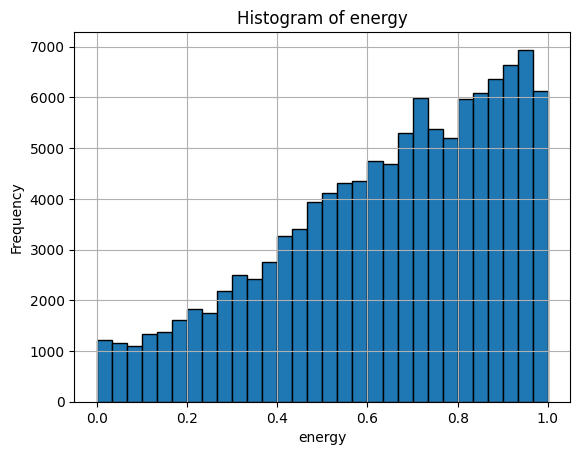

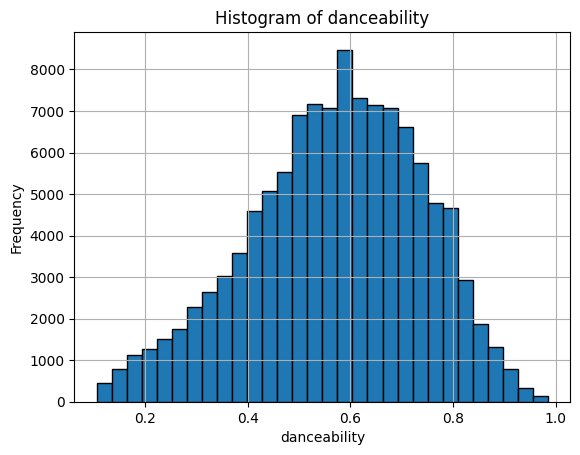

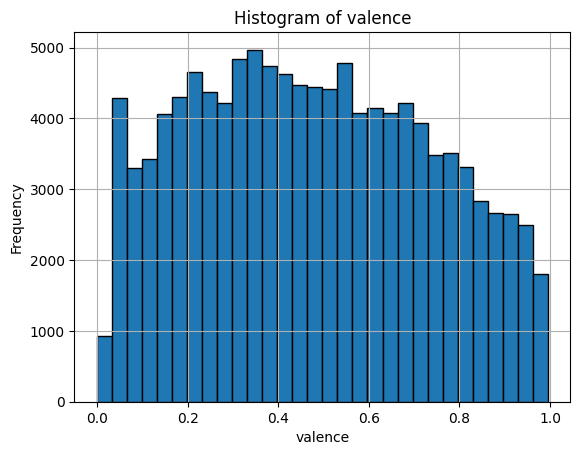

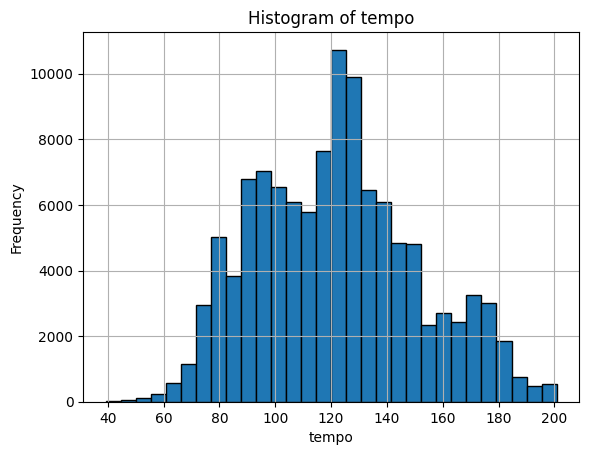

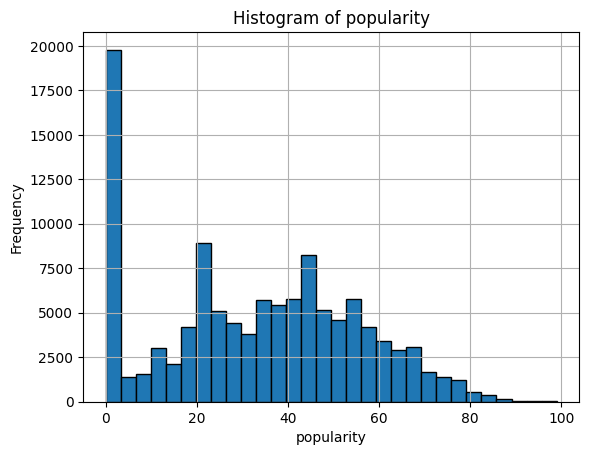

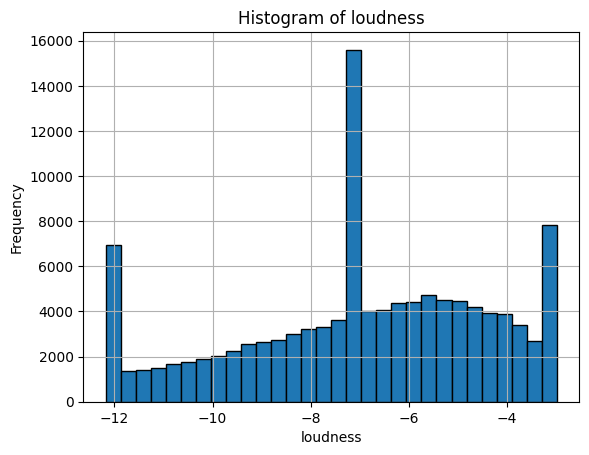

In [ ]:
import matplotlib.pyplot as plt

# Δημιουργία ιστογραμμάτων
columns = ['energy', 'danceability', 'valence', 'tempo', 'popularity', 'loudness']
for col in columns:
    plt.figure()
    data[col].hist(bins=30, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
# Υπολογισμός του πίνακα συσχέτισης Pearson
correlation_matrix = data[['energy', 'danceability', 'valence', 'tempo', 'popularity', 'loudness']].corr()

# Εμφάνιση του πίνακα συσχέτισης
print(correlation_matrix)

                energy  danceability   valence     tempo  popularity  loudness
energy        1.000000      0.110688  0.258934  0.244636    0.001091  0.551793
danceability  0.110688      1.000000  0.459052 -0.073315    0.031551 -0.001166
valence       0.258934      0.459052  1.000000  0.067330   -0.040491  0.101704
tempo         0.244636     -0.073315  0.067330  1.000000    0.016548  0.141590
popularity    0.001091      0.031551 -0.040491  0.016548    1.000000  0.006494
loudness      0.551793     -0.001166  0.101704  0.141590    0.006494  1.000000


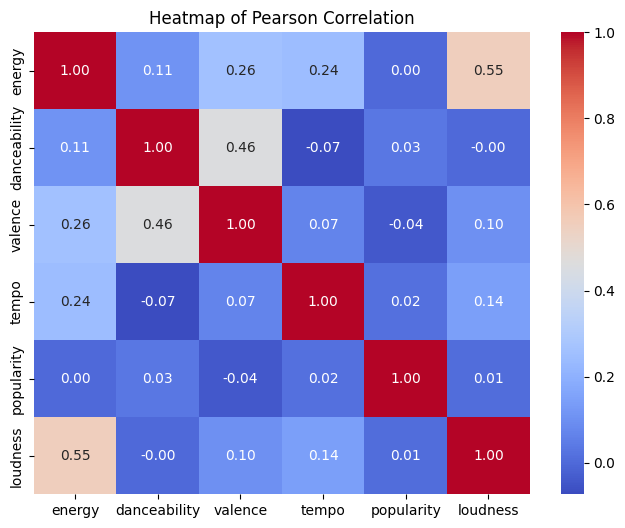

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Υπολογισμός πίνακα συσχέτισης
correlation_matrix = data[['energy', 'danceability', 'valence', 'tempo', 'popularity', 'loudness']].corr()

# Δημιουργία heatmap για οπτικοποίηση
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Pearson Correlation")
plt.show()


In [ ]:
# Εμφάνιση αριθμού δειγμάτων και χαρακτηριστικών
print(f"Αριθμός δειγμάτων: {data_normalized.shape[0]}")
print(f"Αριθμός χαρακτηριστικών: {data_normalized.shape[1]}")

# Ελέγχει αν ο αριθμός χαρακτηριστικών είναι μεγάλος σε σχέση με τα δείγματα
if data_normalized.shape[1] > data_normalized.shape[0]:
    print("Προσοχή: Ο αριθμός των χαρακτηριστικών είναι μεγαλύτερος από τα δείγματα. Εξετάστε μείωση διαστάσεων.")
else:
    print("Ο αριθμός χαρακτηριστικών είναι διαχειρίσιμος.")

Αριθμός δειγμάτων: 114000
Αριθμός χαρακτηριστικών: 21
Ο αριθμός χαρακτηριστικών είναι διαχειρίσιμος.


In [ ]:
from google.colab import files
data.to_csv('cleaned_dataset.csv', index=False)
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>